In [ ]:
import numpy as np
import pandas as pd

In [ ]:
path = "/content/Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv"

In [ ]:
df = pd.read_csv(path)
df.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [ ]:
df = df["High"]
df.head()

0    42330
1    43220
2    43970
3    43700
4    43660
Name: High, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

def plotSeries(data):

  for df in data:

    plt.plot(df)

  plt.show()

In [ ]:
train = df[:int(0.8 * len(df))]

test = df[int(0.8 * len(df)):]

In [ ]:
def arrange(data, window = 10):

  x = []
  y = []

  for i, val in enumerate(data):

    if i < window:

      continue

    x.append((data[i - window: i - 1]).values.reshape(-1, 1))
    y.append(data[i:i+1].values.reshape(-1, 1))

  x = np.asarray(x)
  y = np.asarray(y)

  return x, y

In [ ]:
X_train, Y_train = arrange(train, 15)

print("X-Shape is {} and Y-Shape is {}".format(X_train.shape, Y_train.shape))

X-Shape is (965, 14, 1) and Y-Shape is (965, 1, 1)


In [ ]:
print(X_train[0])

[[42330]
 [43220]
 [43970]
 [43700]
 [43660]
 [43840]
 [44370]
 [43630]
 [43150]
 [43550]
 [43880]
 [43440]
 [43300]
 [44000]]


In [ ]:
print(Y_train[0])

[[41560]]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Input

In [ ]:
X_train.shape[1:]

(14, 1)

In [ ]:
Net = Sequential()
Net.add(SimpleRNN(3, activation = 'relu', input_shape = X_train.shape[1:]))
Net.add(Dense(1, activation = 'relu'))

In [ ]:
Net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 15        
_________________________________________________________________
dense (Dense)                (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Net.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mse'])

In [ ]:
Net.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
31/31 [==============================] - 1s 3ms/step - loss: 109455448.0000 - mse: 109455448.0000
Epoch 2/10
31/31 [==============================] - 0s 3ms/step - loss: 36767240.0000 - mse: 36767240.0000
Epoch 3/10
31/31 [==============================] - 0s 3ms/step - loss: 6718614.5000 - mse: 6718614.5000
Epoch 4/10
31/31 [==============================] - 0s 3ms/step - loss: 2193234.0000 - mse: 2193234.0000
Epoch 5/10
31/31 [==============================] - 0s 3ms/step - loss: 2080387.5000 - mse: 2080387.5000
Epoch 6/10
31/31 [==============================] - 0s 3ms/step - loss: 2075680.8750 - mse: 2075680.8750
Epoch 7/10
31/31 [==============================] - 0s 4ms/step - loss: 2073629.0000 - mse: 2073629.0000
Epoch 8/10
31/31 [==============================] - 0s 4ms/step - loss: 2074781.7500 - mse: 2074781.7500
Epoch 9/10
31/31 [==============================] - 0s 4ms/step - loss: 2069890.7500 - mse: 2069890.7500
Epoch 10/10
31/31 [==============================

In [ ]:
X_test, Y_test = arrange(test, 10)
pred = Net.predict(X_test)
pred[:,0]

array([18272.33  , 18164.68  , 18062.791 , 17790.646 , 17644.615 ,
       17667.559 , 17784.512 , 17613.926 , 17351.047 , 17337.707 ,
       17131.146 , 16857.676 , 16970.998 , 16924.633 , 16477.379 ,
       16055.164 , 15936.105 , 15969.823 , 15931.012 , 15665.673 ,
       15325.783 , 15459.907 , 15796.191 , 15757.894 , 15871.931 ,
       16216.802 , 16333.532 , 16144.951 , 16102.4795, 16378.72  ,
       16618.928 , 16832.275 , 16838.355 , 16645.127 , 16528.19  ,
       16317.143 , 15934.149 , 15620.476 , 15477.823 , 15505.915 ,
       15486.042 , 15006.855 , 14604.468 , 14952.479 , 16017.436 ,
       17390.123 , 17955.4   , 17645.879 , 17131.36  , 16804.299 ,
       16608.6   , 16416.527 , 16795.582 , 17087.828 , 16765.482 ,
       16709.803 , 17045.988 , 17007.342 , 16736.402 , 16745.678 ,
       16932.23  , 17287.271 , 17483.264 , 17035.582 , 16627.367 ,
       16594.242 , 16707.916 , 16800.14  , 16657.88  , 16664.45  ,
       16936.393 , 17098.463 , 17066.014 , 17117.377 , 17199.8

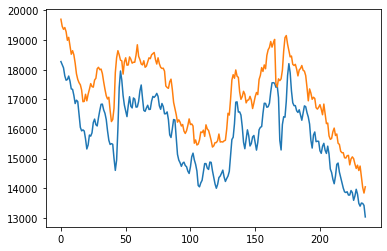

In [ ]:
plotSeries([pred[:,0], Y_test[:,:,0]])